# Wasserstein GAN
> Martin Arjovsky(Courant Institute of Mathematical Sciences), Soumith Chintala(Facebook AI Research), and L´eon Bottou(Courant Institute of Mathematical Sciences, Facebook AI Research)

- toc:true
- branch: master
- badges: false
- comments: false 
- author: 최서연
- categories: [Wasserstein GAN, GAN, 논문리뷰]

ref: https://arxiv.org/pdf/1701.07875.pdf

-----------

wgan math: https://www.slideshare.net/ssuser7e10e4/wasserstein-gan-i

jonathan hui: https://jonathan-hui.medium.com/gan-wasserstein-gan-wgan-gp-6a1a2aa1b490

-----------

정리
- KL 발산과 JS 발산은 기울기 손실 때문에 제대로 학습하지 못하는 경우가 있다!
- 그래서 GAN 이 제안되었는데, 모델을 불안정하게 만드는 큰 기울기 변수를 가진 새로운 함수에서는 GAN 자체도 불안했다
- 1-립시츠함수()를 사용, 가중치 클리핑을 제한한 와서스테인 거리로 WGAN 제시
    - discriminator 식을 EM 거리(와서스테인거리)를 이용하여 변형함으로써 기울기가 잘 흘러가도록 해서 GAN이 실제 최적화 지점에 도달하는 것을 도왔고, GAN 학습 안정화 및 모드 붕괴 문제도 헤결할 수 있었음
    - 단순하게 말하면 GAN 의 discriminator는 sigmoid값이 결과라 진짜/가짜를 0,1로 가리지만 WGAN은 와서스테인 거리를 이용하기 때문에 scalar를 결과로 산출해서 가짜에 가까운지 진짜에 가까운지 점수로 보여주기 때문에 결과가 더 좋음
- 하지만 가중치 클리핑(c)을 제한하는 것은 discriminator의 가중치를 하이퍼 파라미터c가 건드는(제약하는) 일이 되어버림
- WGAN-GP를 제안
    - GAN을 WGAN-GP로 바꾸는 조건!!
        - critic loss 함수에 기울기 패널티 항을 포함한다.
        - critic의 가중치를 클리핑하지 않는다.
        - critic에 배치 정규화 층을 사용하지 않는다.(배치정규화는 상관관계를 만든다.)


---

## Different Distances

- Let $X$ be a compact metric set (such as the space of images $[0, 1]^d$) 
    - compact하다는 것은 close하고 bounded 하다는 것!
- and let $Σ$ denote the set of all the Borel subsets of $X$ . 
- Let $Prob(X )$ denote the space of probability measures defined on $X$ .
- We can now define elementary distances and divergences between two distributions $P_r, P_g ∈ Prob(X )$
    - The Total Variation (TV) distance
        - Total Variation(TV)은 두 확률측도의 측정값이 벌어질 수 있는 값 중 가장 큰 값(혹은  supremum)
        - 같은 집합 A라 하더라도 두 확률분포가 측정하는 값은 다를 수 있고, 이 때 TV는 모든 $A \in \Sigma$에 대해 가장 큰 값으로 정의한 것
        - 만약 두 확률분포의 확률밀도함수가 서로 겹치지 않는다면(확률분포의 suppot의 교집합이 공집합이라면) TV는 무조건 1
    - The Kullback-Leibler (KL) divergence
        - KL은 대칭성과 삼각부등식이 깨지기 때문에 metric이 아니지만, Premetric!
        - TV 보다 Strong함(즉, KL으로 TV 설명 가능), 그래서 TV에서 수렴하지 않으면 KL에서 수렴하지 않음
    - The Jensen-Shannon (JS) divergence
        - JS는 TV랑 equivalent 함.(즉, 서로를 표현 가능), 그래서 TV에서 수렴하지 않으면 JS에서 수렴하지 않음
    - The Earth-Mover (EM) distance or Wasserstein-1
    - p값들은 절대적으로 연속!
    - 그러므로 카이제곱에서 정의되는 같은 측정치 뮤가 나옴.
- The following example illustrates how apparently simple sequences of probability distributions converge under the EM distance but do not converge under the other distances and divergences defined above
    - 다음 예시에서 보기에 단순한 확률 분포 시퀀스가 EM 거리에서는 수렴하지만 제시된 4개의 거리 및 발산에서는 수렴하지 않음을 보임.

$\star$ mode 쉽게 말하면 분포 내에서 최빈값

$X$: compact metric set
- Metric은 Distance라고도 불리며, 5가지 성분 만족하는 거리함수 d가 존재하는 걸 말함
    - $d(x,y) \geq 0$
    - $d(x,y) = 0$ 이면 $x=y$ 다.
    - $x=y$이면 $d(x,y) = 0$이다.
    - $d(x,y)=d(y,x)$: 대칭이다.
    - $d(x,y) \leq d(x,z) + d(z,y)$ 삼각부등식이 성립한다.
- metric의 개념의 중요성
    - 수렴convergence의 개념을 정의내릴 수 있기 때문.

*Example 1 (Learning parallel lines)*

- Let $Z ∼ U[0, 1]$ the uniform distribution on the unit interval.
- Let $P_0$ be the distribution of $(0, Z) ∈ R^2$ (a 0 on the x-axis and the random variable Z on the y-axis), uniform on a straight vertical line passing through the origin.
- Now let $g_θ(z) = (θ, z)$ with $θ$ a single real parameter. 
- It is easy to see that in this case,

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb9zZja%2Fbtqu13zUEKO%2FGdnlWnoWSmkk9G0CSZgqx0%2Fimg.png)

위에서 볼 수 있듯이 와서스테인 거리의 경우에만 세타에 상관없이 일정한 수식을 가지고 있지??
- 그래서 다른 거리나 발산 공식들에 비해 학습이 수월할거야!

- $\theta \neq 0$이라면 $P_0$와 $P_{\theta}$는 서로 겹치지 않는 확률분포이므로 TV가 1이 된다.
- $\theta \neq 0$이라면
    - $P_0 (x) \neq 0 \rightarrow P_{\theta}(x) = 0$
    - $P_{\theta} (x) \neq 0 \rightarrow P_{0}(x) = 0$
        - 따라서 $P_{\theta}>0$인 곳에서 $log\big( \frac{P_{\theta}(x)}{P_0 (x)} \big)$값은 무한이 된다.
        - 그래서 KL도 무한, 단, $\theta = 0$이 되지 않을 때
- $\theta \neq 0$이라면
    - $P_0 (x) \neq 0 \rightarrow P_{\theta}(x) = 0 \rightarrow P_m = \frac{P_0}{2} \rightarrow KL(P_0\|P_m) = log2$
    - $P_{\theta} (x) \neq 0 \rightarrow P_{0}(x) = 0 \rightarrow P_m = frac{P_{\theta}}{2} \rightarrow KL()P_{\theta}\|P_m) = log2$
        - JS는 KL처럼 무한대는 되지 않지만 TV처럼 $\theta \neq 0$일땐 log2로 일정한 값만 가지게 된다.
        - $\theta = 0$이면 0
**TV나 KL이나 JS는 두 확률분포 $\mathbb{P}_R, \mathbb{P}_G$가 서로 다른 영역에서 측정된 경우 완전히 다르다고 판단을 내리게끔 metric이 계산되기 때문, 즉, 두 확률 분포의 차이를 harsh하게 봄**
    - GAN에서는 discriminator의 학습이 잘 죽는 이유..
    - 따라서 GAN 학습의 유연성을 위해 수렴에 focus를 맞춘 metric 필요

- When $θ_t → 0$, the sequence ($P_{θ_t})_{t∈N}$ converges to $P_0$ under the EM distance, but does not converge at all under either the JS, KL, reverse KL, or TV divergences.
- Figure 1 illustrates this for the case of the EM and JS distances

- Example 1 gives us a case where we can learn a probability distribution over a low dimensional manifold by doing gradient descent on the EM distance. 
- This cannot be done with the other distances and divergences because the resulting loss function is not even continuous.
    - 결과 손실 함수가 연속적이지 않기 때문에 다른 거리와 발산으로 할 수 없음.
- Although this simple example features distributions with disjoint supports, the same conclusion holds when the supports have a non empty intersection contained in a set of measure zero.
    - disjoint suppoert를 가진 분포를 특장으로 하는 이 단순한 예시는 supports가 0 집합에 포함된 비어 있지 않은 interaction을 가진 때에도 동일한 결과가 유지된다.
- This happens to be the case when two low dimensional manifolds intersect in general position.

- 두 확률변수 $(X,Y)$가 각각 $X~\mathbb{P_0}, Y~\mathbb{P_{\theta}}$라고 할때, 각 $w$에 대해서 $X,Y$는 2치원 공간으로 매핑됨
    - $X(w) = (0,Z_1(w)), Y(w) = (\theta, Z_2(w))$
- 두 점 사이의 거리는 $d(X,Y) = (|\theta - 0|^2 + |Z_1(w) - Z_2(w)|)^{1/2} \geq |\theta|$로 계산
    - $d(X,Y)$의 기대값은 어떤 결합확률분포 $\gamma$ 를 사용하든 항상 $|\theta|$보다 크거나 같음.
    - $\mathbb{e}^{\gamma}[d(X,Y)] \geq \mathbb{E}^{\gamma} [|\theta|] = |\theta|$
        - $Z_1 = Z_2$인 분포를 따를떄 $d(X,Y) = (|\theta - 0|^2 + |Z_1(w) - Z_2(w)|)^{1/2}  = |\theta|$ 가능!
        - 따라서 $W(\mathbb{P_0}, \mathbb{P_{\theta}}) = |\theta|$

![](https://xiucheng.org/assets/images/wgan-example.png)

Since the Wasserstein distance is much weaker than the JS distance , we can now ask whether $W(P_r, P_θ)$ is a continuous loss function on $θ$ under mild assumptions. This, and more, is true, as we now state and prove.

*Theorem 1.*

- Let $P_r$ be a fixed distribution over $X$ .
- Let $Z$ be a random variable(e.g Gaussian) over another space $Z$. 
- Let $g : Z × R^d → X$ be a function, that will be denoted $g_θ(z)$ with $z$ the first coordinate and $θ$ the second.
- Let $P_θ$ denote the distribution of $g_θ(Z)$. Then,
1. If $g$ is continuous in $θ$, so is $W(P_r, P_θ)$.
    - g가 세타에 대해 연속이면 EM 거리도 연속!
2. If $g$ is locally Lipschitz and satisfies regularity assumption 1, then $W(P_r, P_θ)$ is continuous everywhere, and differentiable almost everywhere.
    - g가 립시츠 조건 만족한다면  EM 거리도 연속!
        - 립시츠 거리: 두 점 사이의 거리를 일정 비 이상으로 증가시키지 않는 함수!
3. Statements 1-2 are false for the Jensen-Shannon divergence $JS(P_r, P_θ)$ and all the KLs.

The following corollary tells us that learning by minimizing the EM distance makes sense (at least in theory) with neural networks.
- 다음 결과는 EM 거리를 최소화하여 학습하는 것이 신경망에 타당하다는 것을 말해줌

*Corollary 1*

- Let $g_θ$ be any feedforward neural network parameterized by $θ$, and $p(z)$ a prior over $z$ such that $E_{z∼p(z)}(||z||) < ∞$ (e.g. Gaussian, uniform, etc.)
- Then assumption 1 is satisfied and therefore $W(P_r, P_θ)$ is continuous everywhere and differentiable almost everywhere.

All this shows that EM is a much more sensible cost function for our problem than at least the Jensen-Shannon divergence. The following theorem describes the relative strength of the topologies induced by these distances and divergences, with KL the strongest, followed by JS and TV, and EM the weakest.
- EM이 최소 JS 발산보다 제시한 문제에 보다 더 합리적인 cost function이라는 것을 보임.
- 상대적인 강도는 KL > JS > TV > EM 의 순을 이룸

*Theorem 2.*

- Let $P$ be a distribution on a compact space $X$ and $(P_n)_{n∈N}$ be a sequence of distributions on $X$ .
- Then, considering all limits as $n → ∞$, 
1. The following statements are equivalent 
    - $δ(P_n, P) → 0$ with δ the total variation distance 
    - $JS(P_n, P) → 0$ with JS the Jensen-Shannon divergence.
2. The following statements are equivalent
    - $W(P_n, P) → 0.$
    - $P_n D→ P$ where $D→$ represents convergence in distribution for random variables.
3. KL($P_n|P) → 0$ or KL($P|P_n) → 0$ imply the statements in (1).
4. The statements in (1) imply the statements in (2).

This highlights the fact that the KL, JS, and TV distances are not sensible cost functions when learning distributions supported by low dimensional manifolds. However the EM distance is sensible in that setup. This obviously leads us to the next section where we introduce a practical approximation of optimizing the EM distance.

- TV, KL, JS 는 $(\mathbb{P}_{r}, \mathbb{P}_g)$가 서로 겹치지 않는 상황에서는 불연속이 된다.
- EM(Wasserstein distance)은 TV, KL, JS 보다 약한weak metric이므로 수렴하는데 무른soft 성질을 가진다.
- EM은 분포수렴과 동등하다.
    - 분포수렴
        - 확률분포 수렴 종류 중 하나로서, 가장 약한weak 수렴.
        - 확률분포의 개별적인 특징보다 전체적인 모양을 중시하는 수렴
        - 중심극한정리에서 표본평균이 정규분포로 수렴하는 종류가 분포수렴
        - $X_n$의 모든 모멘트가 $X$의 모멘트로 수렴하면 분포수렴
        - $X_n$의 누적확률밀도함수가 $X$의 누적확률밀도함수 중 연속인 모든 점에서 수렴하면 분포수렴
        - $X_n$의 푸리에 변환Fourier transform이 수렴하면 분포수렴

$\star$ 립시츠 조건을 만족하기 위해서 아래 계속 clipping 할 예정~

## Wasserstein GAN

- Again, Theorem 2 points to the fact that $W(P_r, P_θ)$ might have nicer properties when optimized than $JS(P_r, P_θ)$. 
- However, the infimum in (1) is highly intractable. 
- On the other hand, the Kantorovich-Rubinstein duality [22] tells us that (2)

$\star$ **inf A = max{lower bound of A}, 즉 infmnum 은 the greatest lower bound로서, 하한값lower bound 중 가장 큰 값maximum임!**

$\star$ **supA = min{upper bound of A}, 즉 Supermum은 the least upper bound 로서, 상한값upper bound 에서 가장 작은 값minimum임!**

- WGAN, $W{\mathbb{P}, \mathbb{Q}} = \inf_{\substack{ \gamma \in \prod (\mathbb{P},\mathbb{Q}) }} \mathbb{E}^{\gamma} [d(X,Y)]$
    - $\prod (\mathbb{P}, \mathbb{Q})$는 두 확률분포 $\mathbb{P}, \mathbb{Q}$의 결합확률분포들을 모은 집합, $\gamma$는 그 중 하나.
    - 즉 모든 결합확률분포 $\prod (\mathbb{P}, \mathbb{Q})$ 중에서 $d(X,Y)$의 기대값을 가장 작게 추정한 값

##  Empirical Results

We run experiments on image generation using our Wasserstein-GAN algorithm and show that there are significant practical benefits to using it over the formulation used in standard GANs.

We claim two main benefits:
-  a meaningful loss metric that correlates with the generator’s convergence and sample quality
- improved stability of the optimization process

### Experimental Procedure

The target distribution to learn is the LSUN-Bedrooms dataset [24] – a collection of natural images of indoor bedrooms.

Our baseline comparison is DCGAN [18], a GAN with a convolutional architecture trained with the standard GAN procedure using the − log D trick.

The generated samples are 3-channel images of 64x64 pixels in size.

 We use the hyper-parameters specified in Algorithm 1 for all of our experiments.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcdzH6j%2Fbtqu1s1iIpM%2FDWoDjAxuENK3jhXgEWQ9g0%2Fimg.png)

Figure 3: Training curves and samples at different stages of training.
-  We can see a clear correlation between lower error and better sample quality.
- upper left: the generator is an MLP with 4 hidden layers and 512 units at each layer.
    -  The loss decreases constistently as training progresses and sample quality increases. 
- upper right: the generator is a standard DCGAN.
    - In both upper plots the critic is a DCGAN without the sigmoid so losses can be subjected to comparison.
- Lower half: both the generator and the discriminator are MLPs with substantially high learning rates (so training failed).
    - Loss is constant and samples are constant as well. 
    - The training curves were passed through a median filter for visualization purposes

###  Meaningful loss metric

Because the WGAN algorithm attempts to train the critic f (lines 2–8 in Algorithm 1) relatively well before each generator update (line 10 in Algorithm 1), the loss function at this point is an estimate of the EM distance, up to constant factors related to the way we constrain the Lipschitz constant of f.
- WGAN 알고리즘은 각 generator 업데이트가 상대적으로 잘 되기 전에 critic f를 학습하려고 시도하기 때문에, 그 지점에서 손실함수는 f의 립시츠 constant를 제약하는 방법과관련된 constant 요인에 따른 EM 거리의 추정치가 된다.

Our first experiment illustrates how this estimate correlates well with the quality of the generated samples. 

Besides the convolutional DCGAN architecture, we also ran experiments where we replace the generator or both the generator and the critic by 4-layer ReLU-MLP with 512 hidden units.

Figure 3 plots the evolution of the WGAN estimate (3) of the EM distance during WGAN training for all three architectures. The plots clearly show that these curves correlate well with the visual quality of the generated samples.
- plot에서는 생성된 샘플의 시각적 quality와 curve가 좋은 상관관계에 있다는 것을 명확히 보여준다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcfa3kB%2Fbtqu13NvCe7%2FyMOv6wUAJ7KLx2b8jN2HM0%2Fimg.png)

Figure 4: 
- JS estimates for an MLP generator (upper left) and a DCGAN generator (upper right) trained with the standard GAN procedure. 
- Both had a DCGAN discriminator.
- Both curves have increasing error.
- Samples get better for the DCGAN but the JS estimate increases or stays constant, pointing towards no significant correlation between sample quality and loss.
- Bottom: MLP with both generator and discriminator. The curve goes up and down regardless of sample quality.
-  All training curves were passed through the same median filter as in Figure 3.

To our knowledge, this is the first time in GAN literature that such a property is shown, where the loss of the GAN shows properties of convergence. 

This property is extremely useful when doing research in adversarial networks as one does not need to stare at the generated samples to figure out failure modes and to gain information on which models are doing better over others.
- 이 속성은 실패한 mode를 알아내고, 어떤 모델이 다른 것보다 좋은지의 정보를 얻기 위해 생성된 샘플들을 볼 필요가 없기 때문에 적대적 네트워크를 연구할 때 정말 유용하다.

However, we do not claim that this is a new method to quantitatively evaluate generative models yet. The constant scaling factor that depends on the critic’s architecture means it’s hard to compare models with different critics. Even more, in practice the fact that the critic doesn’t have infinite capacity makes it hard to know just how close to the EM distance our estimate really is. This being said, we have succesfully used the loss metric to validate our experiments repeatedly and without failure, and we see this as a huge improvement in training GANs which previously had no such facility.

**This quantity clearly correlates poorly the sample quality. Note also that the JS estimate usually stays constant or goes up instead of going down.**

In fact it often remains very close to log 2 ≈ 0.69 which is the highest value taken by the JS distance.

Finally, as a negative result, we report that WGAN training becomes unstable at times when one uses a momentum based optimizer such as Adam [8] (with β1 > 0) on the critic, or when one uses high learning rates.

Since the loss for the critic is nonstationary, momentum based methods seemed to perform worse. 

**We identified momentum as a potential cause because, as the loss blew up and samples got worse, the cosine between the Adam step and the gradient usually turned negative. The only places where this cosine was negative was in these situations of instability.** 
- $\star$ Adam 안 쓴 이유
- 실험 결과 critic을 학슿할때 Adam과 같은 momentum base optimizer를 사용하면 학습이 불안정함!!
    - loss값이 튀고 샘플이 좋지 않은 경우(일반적으로 학습 초반) Adam이 가고자 하는 방향, 즉 이전에 기억했던 방향(Adam step)과 기울기 방향 간의 cosine 값이 음수가 된다는 것이다.
    - 일반적으로 nonstationary 문제(극한값이 존재하지 않음)에 대해서는 momentum 계열보다 RMSProp 이 성능이 더 좋다고 한다.(여기서 정의한 문제도 nonstationary problem)

We therefore switched to RMSProp [21] which is known to perform well even on very nonstationary problems [13].

$\star$ **discriminator 의 경우 일반적인 분류 신경망과 같이 이미지가 진짜인지 가짜인지 시그모이드 확률값으로 판별해낸다. 하지만 critic의 경우 와서스테인GAN 식 자체를 사용하기 때문에 scalar값이 출력된다. 이는 이미지가 진짜인지 가짜인지에 대한 점수를 의미하는 것이므로 시그모이드와 달리 saturation 현상은 없고 좋은 기울기만 만들어내게 된다.**

### Improved stability

One of the benefits of WGAN is that it allows us to train the critic till optimality. 

When the critic is trained to completion, it simply provides a loss to the generator that we can train as any other neural network. 

**This tells us that we no longer need to balance generator and discriminator’s capacity properly.**

The better the critic, the higher quality the gradients we use to train the generator.

We observe that WGANs are much more robust than GANs when one varies the architectural choices for the generator. We illustrate this by running experiments on three generator architectures: 
- (1) a convolutional DCGAN generator, 
- (2) a convolutional DCGAN generator without batch normalization and with a constant number of filters, and 
- (3) a 4-layer ReLU-MLP with 512 hidden units. 

The last two are known to perform very poorly with GANs. We keep the convolutional DCGAN architecture for the WGAN critic or the GAN discriminator.

Figures 5, 6, and 7 show samples generated for these three architectures using both the WGAN and GAN algorithms.

We refer the reader to Appendix F for full sheets of generated samples. Samples were not cherry-picked.

**In no experiment did we see evidence of mode collapse for the WGAN algorithm.**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fu0gFw%2Fbtqu1DaqDg2%2FdnKiu9aqEDHrL6KWkzVYY0%2Fimg.png)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdieO6m%2Fbtqu2HXvq4A%2FSKHAQU1vWRSgaC4m2LtFKk%2Fimg.png)

---

ref: https://jonathan-hui.medium.com/gan-wasserstein-gan-wgan-gp-6a1a2aa1b490

## GAN — Wasserstein GAN & WGAN-GP

GAN을 훈련하는 것이 어려운 이유
1. 모델들이 수렴하지 않을 수 있다.
2. 모드 축소가 일반적이다.

### Earth-Mover (EM) distance/ Wasserstein Metric

와서스테인 거리(혹은 EM 거리)는 chpeapest tranport plan의 cost이다!

와서스테인 거리 설명 위한 base
- 데이터 분포 q를 데이터 분포 p로 변환하기 위한 최소 질량 운반 비용minimum cost of tranporting mass.
- 실제 데이터 분포 와 생성된 데이터 분포에 대한 와서스테인 거리는 수학적으로 모든 tranport plan에 대한 하한(최소값)으로 정의된다.

![](https://miro.medium.com/max/1400/1*Fd1-qVkNAbLbgEetsZfBdA.png)

- $Π(P_r, P_g)$ denotes the set of all joint distributions $γ(x, y)$ whose marginals are respectively $P_r$ and $P_g$.
    - 결합확률분포 $Π(P_r, P_g)$ 중에서 maginal이 각각 pr,pg인 모든 결합 분포 $γ(x, y)$ 의 집합

---

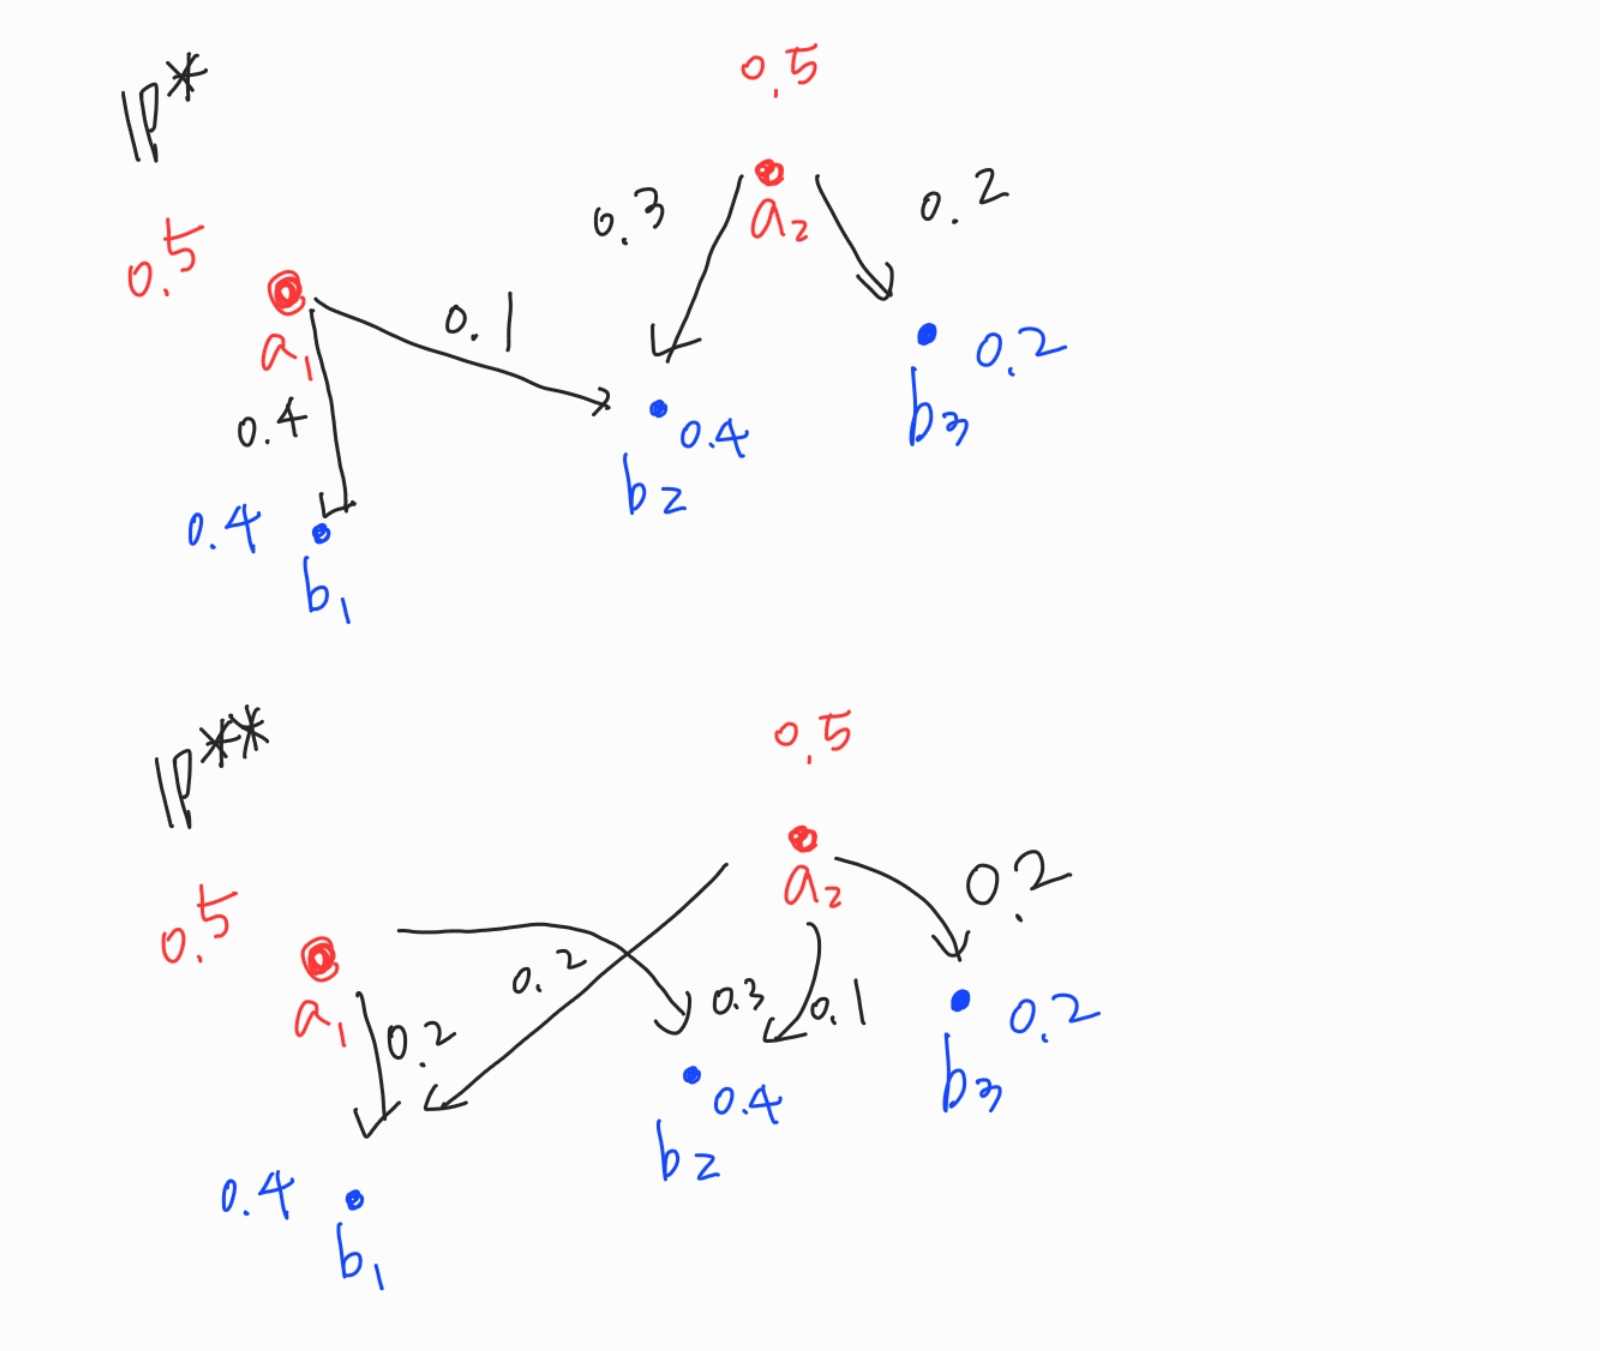

In [2]:
from PIL import Image
Image.open('2022-02-17-wganex.jpg')

확률분포표가 다음과 같이 정의됨

$P_r$

|x|$a_1$|$a_2$|
|---|---|---|
|$P(x)$|0.5|0.5|

$P_g$

|x|$b_1$|$b_2$|$b_3$|
|---|---|---|---|
|$P(x)$|0.4|0.4|0.2|

가능한 joint

|$x,y$|$P^*(x,y)$|$P^{**}(x,y)$|...|
|---|---|---|---|
|$a_1, b_1$|0.4|0.2|...|
|$a_1, b_2$|0.1|0.3|...|
|$a_1, b_3$|0|0|...|
|$a_2, b_1$|0|0.2|...|
|$a_2, b_2$|0.3|0.1|...|
|$a_2, b_3$|0.2|0.2|...|

$= d(a_1 - b_1)\times 0.4 + d(a_1,b_2) \times 0.1 + ...$

- 위와 같이 거리를 구해본 후 그 중 가장 작은 값을 pick하는 것이 와서스테인 거리이다.

---

KL발산과 JS발산
- P와 Q가 같을때 발산은 0이 된다. 
- q의 평균이 증가함으로써, 발산이 증가한다.
- 즉. 생성자는 기울기 손실로부터 아무것도 배우지 못하게 된다.
    - 생성된 이미지가 가진 분포 q가 실제 p와 멀리 떨어져 있으면 아무것도 배우지 못한다.

![](https://miro.medium.com/max/1400/1*z0iqDwqztj_PcgKxu2QQHw.jpeg)

![](https://miro.medium.com/max/1400/1*N0eggxE65amVSI0FE0zzAg.jpeg)

원래 GAN은 이 기울기 손실 문제를 해결(?)하기 위한 대안적인 cost 함수로 제시되었는데, 모델을 불안정하게 만드는 큰 기울기 변수를 가진 새로운 함수에서는 GAN 자체도 불안했다
- 이 뜻은 또 기울기 소실 문제가 발생했다는 뜻?!

### Wasserstein Distance

이에 WGAN은 노이즈를 추가하지 않고 와서스테인 거리를 이용해서 새로운 cost 함수를 제안한 것!

**WGAN learns no matter the generator is performing or not.**
- WGAN은 generator가 perform하든 안 하든 학습한다!

아래 이미지는 wgan 논문에 있는 거 (위에서도 사용된)

![](https://miro.medium.com/max/1400/1*-VajV2qCbPWDCdNGbQfCng.png)

이 그림은 GAN, WGAN에 대해 D(X)의 값에서 유사한 plot을 반복한 것인데,
- 빨간 GAN 선의 경우 감소하거나 폭발하는 기울기의 영역으로 채워져 있다.
- 하늘색인 WGAN 선의 경우 generator가 나은 이미지르를 만들지 않아도 기울기가 어디서든지 부드럽고 잘 학습되는 것을 볼 수 있다!

### Wasserstein GAN

![](https://miro.medium.com/max/1400/1*6y-tz57odJpHh4pwRfXACw.png)

여기서 sup은 최소값들중에 상한값, f는 1-립시츠함수!(조건:$|f(x_1)-f(x_2)| \le |x_1 - x_2|$)
- 그리니까 와서스테인 거리를 계산하기 위해서 1-립시츠함수를 찾으면 되겠지?
- 이걸 학습하기 위한 deep network를 구축할 수 있는데, 실제로 시그모이드 함수가 없는 discriminator D와 네트워크가 매우 유사하고 확률보다는 스칼라 점수를(EM 거리의 결과) 출력함.
    - 이를 state(input)이 얼마나 좋은지 측정하는 가치 함수value function라 부를 예정~
- discriminator의 새로운 역할을 반영하기 위해 critic으로 이름도 변경~
    - discriminator는 가짜/진짜를 판별하기 위해 sigmoid를 사용하고 output은 가짜/진짜에 대한 예측 확률 값이다.
    - 반면 critic은 EM(Earth Mover) distance로부터 얻은 scalar값을 이용한다.
        - EM distance는 확률 붙포 사이의 거리를 측정하는 척도 중 하나인데, 그동안 일반적으로 사용된 척도는 KL 발산이다.
        - KL 발산은 매우 엄격하게 거리를 측정하는 방법이라서 연속되지 않는 경우가 있으며 학습시키기도 어렵다.

**GAN**

![](https://miro.medium.com/max/1400/1*M_YipQF_oC6owsU1VVrfhg.jpeg)

**WGAN**

![](https://miro.medium.com/max/1400/1*Yfa9bZL0d4NHaU1mHbGzjw.jpeg)

설계한 것을 보면 critic이 시그모이드 함수를 출력하지 않았다는 것만 빼고 거의 동일하다!

![](https://miro.medium.com/max/1400/1*5jF5gbIDwU6k9m1ILl0Utg.jpeg)

이렇게 cost함수만 다르지! 여기서 주의할 점은 f가 1-립시츠 함수라는 점~

1-립시츠 함수의 제약 조건 걸려고 WGAN은 f의 최대 가중치를 제한하는 간단한 클립핑을 제한한다~
- 즉, discriminator의 가중치는 초매개변수 c에 의해 제어되는 특정 범위 안에 있어야 함!!!

![](https://miro.medium.com/max/1400/1*6vhidunAHMVDZ3nIpjWzjg.png)

### Algorithm

![](https://miro.medium.com/max/1400/1*JOg9lC2JLl2Crmx5uk6S2g.png)

### Experiment

#### Correlation between loss metric and image quality

GAN의 loss는 이미지 품질의 측정보다는 얼마나 discriminator 를 잘 속이는지를 측정함~
- 첫번째 그림을 보면 GAN은 generator loss가 화질이 좋아져도 떨어지지 않음!
    - 이 말은 우리가 어떻게 진행되고 있는지 설명하기 어렵다는 뜻이겠지?
    - 하지만 우리는 테스트한 이미지를 저장하고 시각적으로 평가해야 하잖아?
- 세번째 그림을 보면 WGAN loss 함수는 이미지 품질을 더 바람직하게 반영하는 것을 볼 수 있어!

![](https://miro.medium.com/max/1400/1*BKai93EIfFfVpwFHlDDhug.jpeg)

#### Improve training stability

WGAN의 중요한 contribution 두 가지!
1. experiment에서 모드의 불과 sign은 없었다!
2. generator는 critic이 잘 perform할 때 여전히 학습할 수 있다!

DCGAN에서 배치정규화 제거해도 WGAN은 여전히 perform가능~~

![](https://miro.medium.com/max/1400/1*F_M3KzHDud7CuBb2DCtzSA.jpeg)

### WGAN — Issues

#### Lipschitz constraint

클리핑하면 critic 모델에 립시츠 제약조건을 적용해서 와서스테인 거리를 계산할 수 있음~

$\star$ 립시츠 제약 간단히 정리
$$||f(x_1)-f(x_2)| \le K|x_1 - x_2$$
이 부등식을 만족하면 1-립시츠라고 부르는데, 여기서 $x_1-x_2$는 두 이미지 픽셀의 평균적인 절대값 차이이고 $||f(x_1)-f(x_2)|$는 비평자 예측 간의 절대값 차이이다. 기본적으로 두 이미지 사이에서 비평자의 예측이 변화할 수 있는 비율을 제한할 필요가 있다. 즉, 기울기의 절대값이 어디에서나 최대 1이어야 한다. 그러면 이 직선은 어느 지점에서나 상승하거나 하강하는 비율이 한정되어 있다!!

WGAN의 difficulty는 립시츠 제약을 강제로 적용하는 건데 clipping은 단순한데 약간 문제있어~
- 그 모델은 여전히 품질 낮은 이미지를 만들 수 있고 hyperparameter c가 올바르게 조정되지 않을때 수렴되지 않을 수 있지!

model perfomenmce는 htperparameter에 매우 민감해!!

- 문제1. clipping parameter c가 크면 limit(-c,c)에 도달하는 시간이 오래걸리기 때문에 최적화 지점까지 학습하는데 시간이 오래걸리고, c가 작으면 기울기 소실 문제가 발생해버린다!
- 문제2. regularizer로 작용해서 함수 f의 capacity도 줄인다!

![](https://miro.medium.com/max/1400/1*RlnW0f-Gg8fC17GiUaYwNQ.png)

### Model capacity

첫번째 줄은 WGAN
- capacity 가 감소되었을때 복접한 경계를 만들지 못함

두번쨰 줄은 WGAN-GP
- capacity가 감소되었을때 복잡한 경계를 만듦!
- 가중 클리핑weightclipping 은 모델 f의 capacity를 줄이고 복잡한 함수들을 모델화하기 위한 가능성을 제약함!

![](https://miro.medium.com/max/1400/1*eP-QrSB2gfnB42p0ytNy2w.png)

### Wasserstein GAN with gradient penalty (WGAN-GP)

WGAN-GP는 weight clipping 대신 기울기 패널티를 사용해서 립시츠 제약을 적용함
$$||f(x_1)-f(x_2)| \le K|x_1 - x_2|$$

WGAN을 WGAN-GP로 바꾸는 조건!!
1. critic loss 함수에 기울기 패널티 항을 포함한다.
2. critic의 가중치를 클리핑하지 않는다.
3. critic에 배치 정규화 층을 사용하지 않는다.

$\star$ 배치 정규화
- 배치 정규화는 같은 **배치 안의 이미지 사이에 상관관계를 만들기 때문에** 기울기 패널티 손실의 효과가 떨어진다. 실험을 해보면 critic에서 배치 정규화를 사용하지 않더라도 WGAN-GP이 여전히 훌률한 결과를 만든다는 것을 알 수 있다

#### Gradient penalty

- 입력 이미지에 대한 예측의 기울기 norm과 1 사이의 차이를 제곱한 것
- 이 모델은 자연스럽게 기울기 패널티 항을 최소화하는 가중치를 찾으려고 하고 이는 립시츠 제약을 따르도록 만듦
- 학습 과정의 모든 곳에서 기울기를 계산하는 것은 힘들다. 개신 WGAN-GP는 일부 지점만 기울기를 계산한다.
- 한쪽으로 치우치지 않기 위해 진짜 이미지와 가짜 이미지 쌍을 연결한 직선을 따라 무작위로 포인트를 선택해 보간interpolation 이미지들을 사용한다.

### Algorithm

![](https://miro.medium.com/max/1400/1*yYvwVzRnlVmRFCh7-JOASw.png)